In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Womens Clothing E-Commerce Reviews - NLP.csv', sep=',')

In [3]:
data.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


# EXPLORATION INITIALE

In [4]:
# Dimensions du dataset
data.shape

(23486, 10)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23486 non-null  int64 
 1   Age                      23486 non-null  int64 
 2   Title                    19676 non-null  object
 3   Review Text              22641 non-null  object
 4   Rating                   23486 non-null  int64 
 5   Recommended IND          23486 non-null  int64 
 6   Positive Feedback Count  23486 non-null  int64 
 7   Division Name            23472 non-null  object
 8   Department Name          23472 non-null  object
 9   Class Name               23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 1.8+ MB


In [6]:
# Vérification s'il y a présence de valeurs manquantes
(data.isna().sum()/data.shape[0]).sort_values(ascending= False)

Title                      0.162224
Review Text                0.035979
Division Name              0.000596
Department Name            0.000596
Class Name                 0.000596
Clothing ID                0.000000
Age                        0.000000
Rating                     0.000000
Recommended IND            0.000000
Positive Feedback Count    0.000000
dtype: float64

In [7]:
data.columns

Index(['Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [8]:
# Suppression des colonnes inutiles dans notre étude
data = data.drop(data[['Title','Clothing ID']], axis = 1)

In [9]:
data.head()

,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,34,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


# ANALYSE EXPLORATOIRE

### ANALYSE UNIVARIEE

In [118]:
# Etude de la variable Recommended IND
data['Recommended IND'].unique()

array([1, 0], dtype=int64)

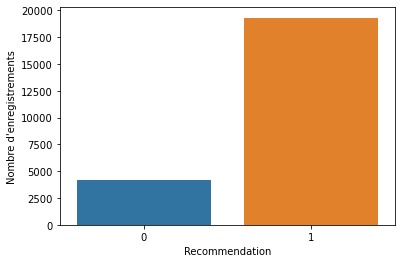

1    0.822362
0    0.177638
Name: Recommended IND, dtype: float64


In [120]:
# Distribution de la variable Recommended IND
sns.countplot(x = 'Recommended IND',data = data)

plt.xlabel('Recommendation')
plt.ylabel("Nombre d'enregistrements")

plt.show()

print(data['Recommended IND'].value_counts(normalize =True))

On a plus de remarques positives que de remarques négatives, alors nos données sont très désequilibrées. 

In [10]:
variables_qualitatives = data.select_dtypes('object')

In [23]:
# Audit des variables catégorielles
data.select_dtypes('object').describe().T

,count,unique,top,freq
Title,19676,13993,Love it!,136
Review Text,22641,22634,Perfect fit and i've gotten so many compliment...,3
Division Name,23472,3,General,13850
Department Name,23472,6,Tops,10468
Class Name,23472,20,Dresses,6319


Text(0.5, 1.0, 'Distribution de la variable Department Name')

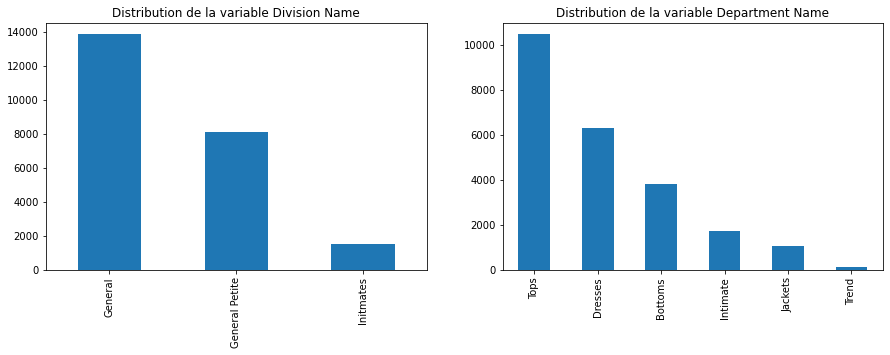

In [30]:
# Distribution des variables Division Name et Department Name 
plt.figure(figsize=(15,10))

plt.subplot(221)
data['Division Name'].value_counts().plot.bar()
plt.title("Distribution de la variable Division Name")

plt.subplot(222)
data['Department Name'].value_counts().plot.bar()
plt.title("Distribution de la variable Department Name")


Text(0.5, 1.0, 'Distribution de la variable Class Name')

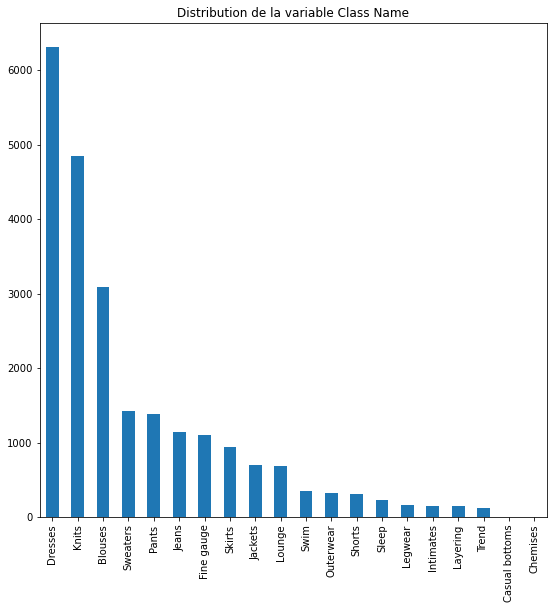

In [36]:
# Distribution des variables Class Name pour apprécier la variable la plus vendue 
plt.figure(figsize=(20,20))

plt.subplot(221)
data['Class Name'].value_counts().plot.bar()
plt.title("Distribution de la variable Class Name")


Les artcles Dresses, Knits e Blouses sont les plus vendus.

In [37]:
# Audit des variables numériques
data.select_dtypes(include ='number').describe().T

,count,mean,std,min,25%,50%,75%,max
Clothing ID,23486.0,918.118709,203.298980,0.0,861.0,936.0,1078.0,1205.0
Age,23486.0,43.198544,12.279544,18.0,34.0,41.0,52.0,99.0
Rating,23486.0,4.196032,1.110031,1.0,4.0,5.0,5.0,5.0
Recommended IND,23486.0,0.822362,0.382216,0.0,1.0,1.0,1.0,1.0
Positive Feedback Count,23486.0,2.535936,5.702202,0.0,0.0,1.0,3.0,122.0


In [77]:
data.select_dtypes(include ='number').columns

Index(['Clothing ID', 'Age', 'Rating', 'Recommended IND',
       'Positive Feedback Count'],
      dtype='object')

In [11]:
variables_quantitatives = data[['Age', 'Rating','Positive Feedback Count']]# Selection des numérques sans Clothing ID et Recommended IND

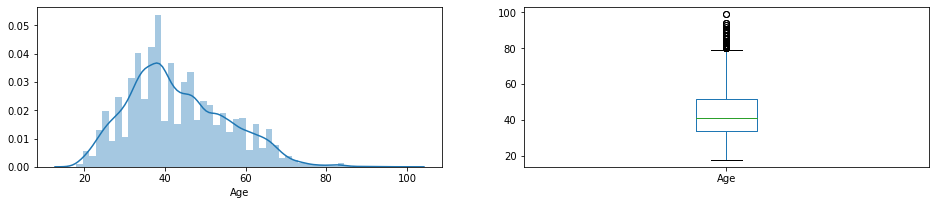

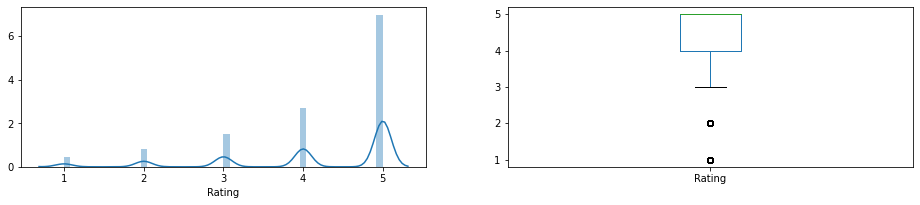

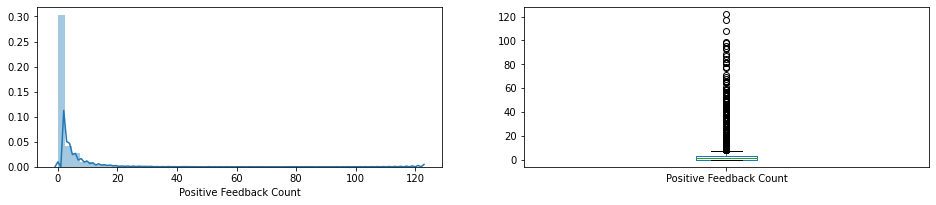

In [80]:
#Distribution des variables quantitatives
for col in variables_quantitatives:
    plt.subplot(321)
    sns.distplot(data[col])

    plt.subplot(322)
    data[col].plot.box(figsize=(16,10))
    plt.suptitle('')
    plt.show()

### ANALYSE BIVARIEE

**ETUDE DE RELATION ENTRE LA VARIABLE RECOMMENDED IND ET QUELQUES VARIABLES NUMERIQUES**

In [81]:
data['Recommended IND'].value_counts()

1    19314
0     4172
Name: Recommended IND, dtype: int64

In [82]:
# Création de sous ensemble de clientes recommendées et non recommendées.
Clientes_recommmendées = data[data['Recommended IND']== 1]
Clientes_Non_recommendées = data[data['Recommended IND']== 0]

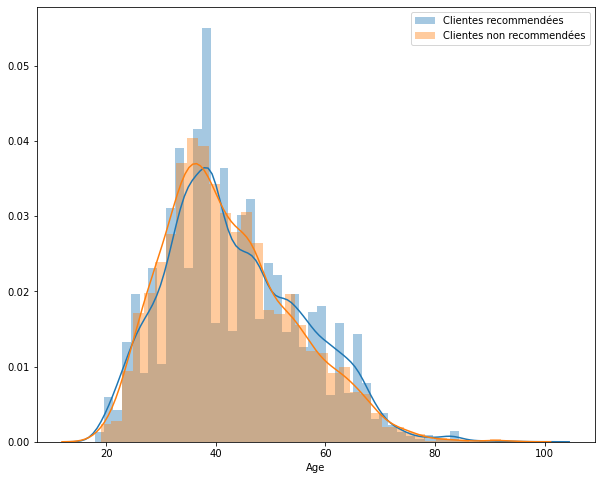

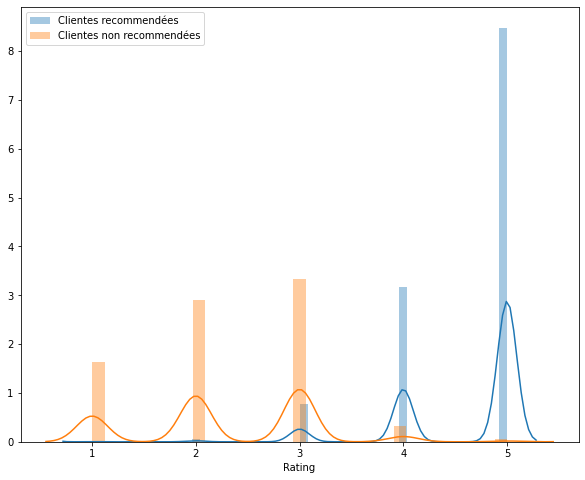

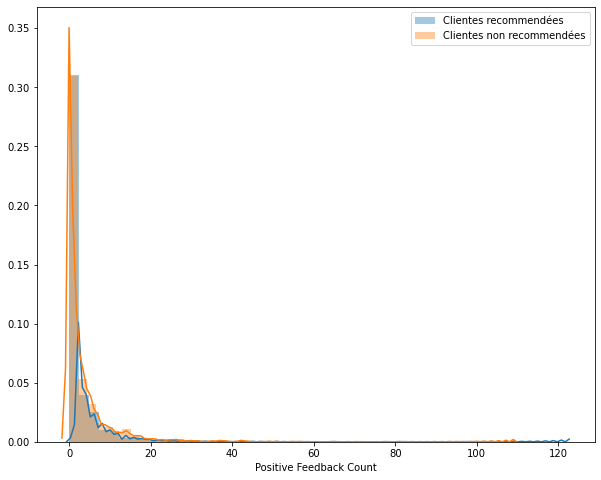

In [83]:
for col in variables_quantitatives:
    plt.figure(figsize =(10,8))
    sns.distplot(Clientes_recommmendées[col], label='Clientes recommendées')
    sns.distplot(Clientes_Non_recommendées[col], label='Clientes non recommendées')
    plt.legend()

On peut remarquer que les clientes recommendées sont agées de moins de 40 ans. Elles ont aussi un score de 5 et ont de feedback positive de moins de 20.

**ETUDE DE RELATION ENTRE LA VARIABLE RECOMMENDED IND ET QUELQUES VARIABLES QUALITATIVES**

In [88]:
variables_qualitatives.columns

Index(['Title', 'Review Text', 'Division Name', 'Department Name',
       'Class Name'],
      dtype='object')

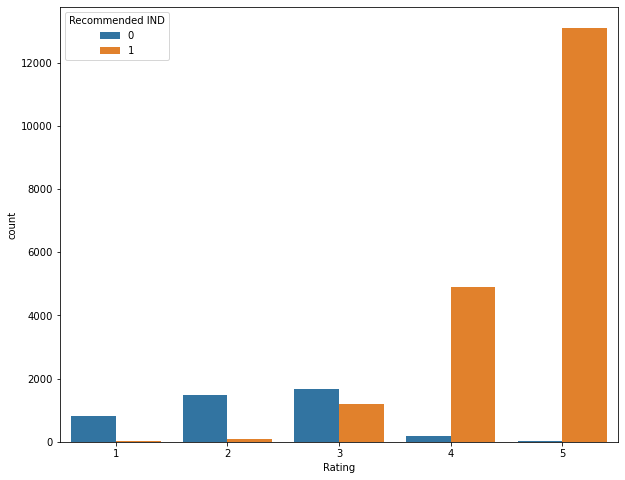

In [117]:
plt.figure(figsize=(10,8))
sns.countplot(x=data['Rating'], data =data, hue = 'Recommended IND')

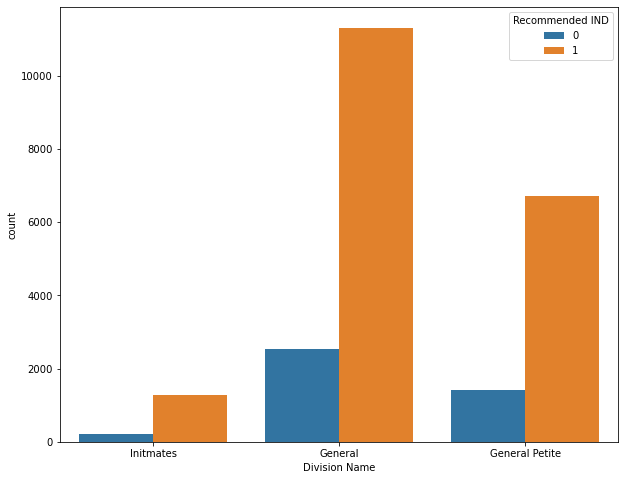

In [91]:
plt.figure(figsize=(10,8))
sns.countplot(x=data['Division Name'], data =data, hue = 'Recommended IND')

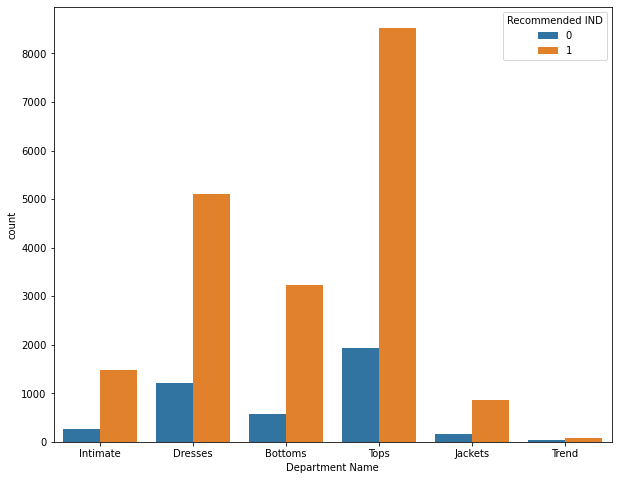

In [92]:
plt.figure(figsize=(10,8))
sns.countplot(x=data['Department Name'], data =data, hue = 'Recommended IND')

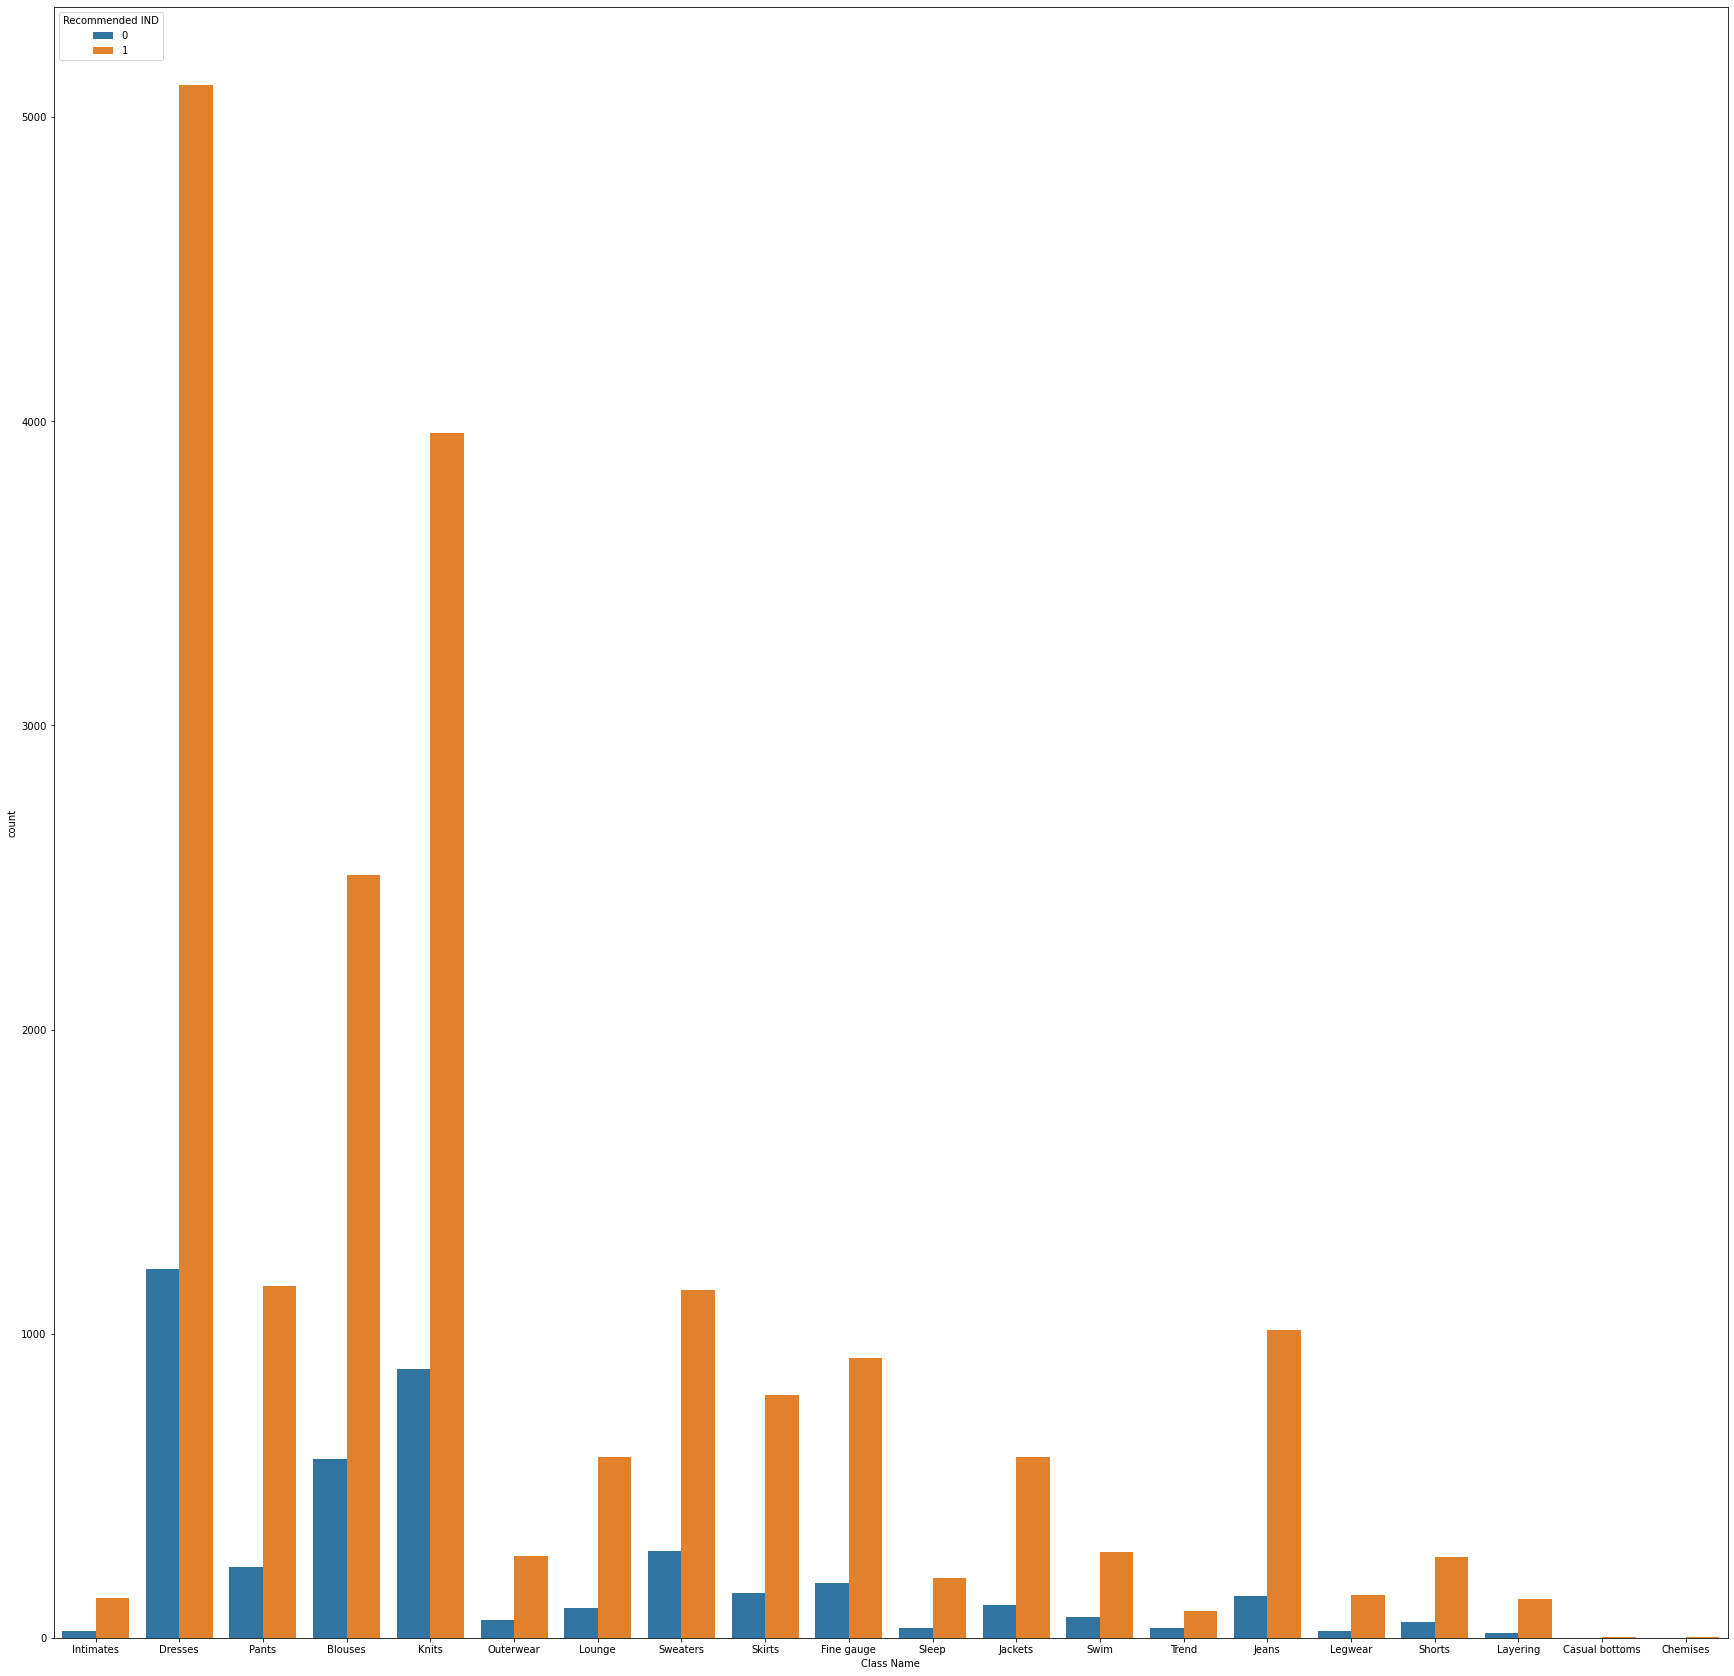

In [96]:
plt.figure(figsize=(30,30))
sns.countplot(x=data['Class Name'], data =data, hue = 'Recommended IND')

### ANALYSE MULTIVARIEE

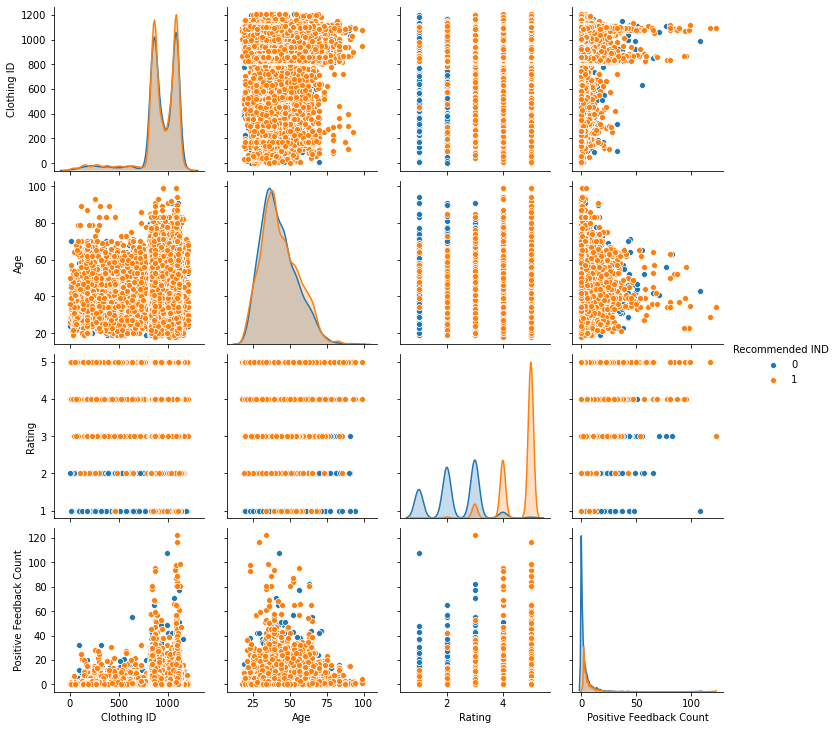

In [115]:
sns.pairplot(data,hue='Recommended IND')

# PRETRAITEMENT DES DONNEES

In [4]:
# Suppression des valeurs manquantes
data_noNa = data.dropna()

In [14]:
data_noNa.isna().sum()

Age                        0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64

### CLEANING DATA

In [5]:
import nltk
import string
from nltk.stem import WordNetLemmatizer
#nltk.download('stopwords')
#nltk.download('punkt')
#nltk.download('words')
#nltk.download('wordnet')

Ensuite on **initialise** :
- les **stopwords**: ce sont les mots qui apparaissent très fréquemment mais qui n'apporte pas de sens à la phrase (comme "de", "le", "une")
- les mots (**words**): qui proviennent d'un dictionnaire **anglais**
- un **lemmatizer** :cet objet nous permet de préserver la racine des mots de tel sorte que deux mots ayant une même souche seront considérés comme un seul et même mot (exemple : 'voisine' et 'voisinage' seront tous deux changer en 'voisin')

In [14]:
#from nltk.corpus import stopwords
#from nltk.tokenize import word_tokenize

In [6]:
stopwords = nltk.corpus.stopwords.words('english')
lemmatizer = WordNetLemmatizer()
words = set(nltk.corpus.words.words())

Puis on construit notre **fonction de preprocessing** qui va successivement :
- enlever la **ponctuation**
- enlever les **chiffres**
- transformer les phrases en **liste de tokens** (en liste de mots)
- enlever les **stopwords** (mots n'apportant pas de sens)
- **lemmatizer**
- enlever les **majuscules**
- **reformer les phrases** avec les mots restants

In [7]:
def Preprocess_listofSentence(listofSentence):
    preprocess_list = []
    for sentence in listofSentence :
        
        sentence_w_punct = "".join([i.lower() for i in sentence if i not in string.punctuation])
        
        sentence_w_num = ''.join(i for i in sentence_w_punct if not i.isdigit())

        tokenize_sentence = nltk.tokenize.word_tokenize(sentence_w_num)
        
        words_w_stopwords = [i for i in tokenize_sentence if i not in stopwords]
        
        words_lemmatize = (lemmatizer.lemmatize(w) for w in words_w_stopwords)

        sentence_clean = ' '.join(w for w in words_lemmatize if w.lower() in words or not w.isalpha())
        
        preprocess_list.append(sentence_clean)
    
    return preprocess_list 

Puis on l'**utilise :**

In [8]:
data_noNa['Review_Text_cleaned'] = Preprocess_listofSentence(data_noNa['Review Text'])

In [9]:
print('Phrase de base :' , data_noNa['Review Text'][2])
print('Phrase nettoyée :', data_noNa['Review_Text_cleaned'][2])

Phrase de base : I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c
Phrase nettoyée : high hope dress really work initially ordered petite small usual size found outrageously small small fact could zip petite medium overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layer major design flaw net layer sewn directly zipper c


In [12]:
data_noNa['Content_Text'] = data_noNa['Review_Text_cleaned'].apply(lambda x : len(x))

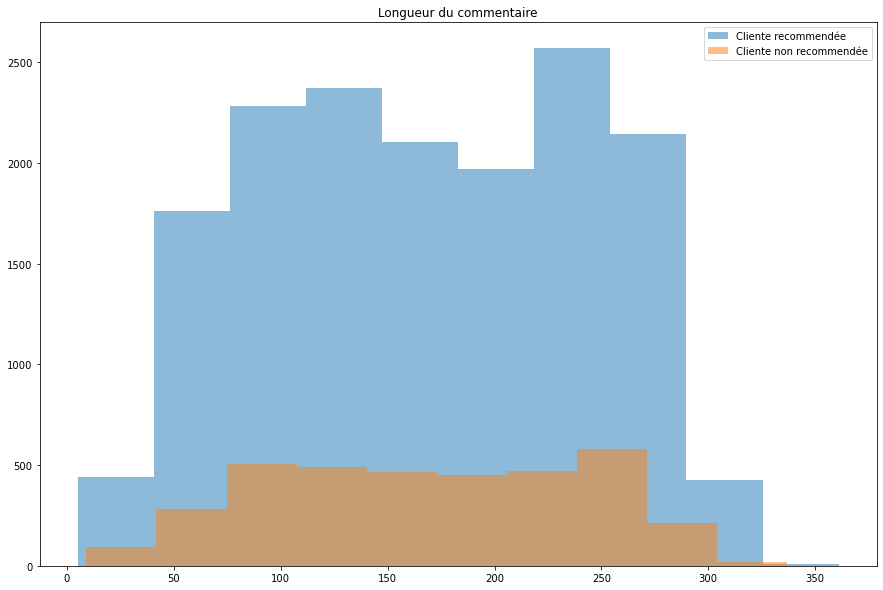

In [46]:
# Visualisation du commentaire le plus long
plt.figure(figsize =(15,10))
plt.hist(data_noNa[data_noNa['Recommended IND']== 1]['Content_Text'], alpha = 0.5, label = 'Cliente recommendée')
plt.hist(data_noNa[data_noNa['Recommended IND']== 0]['Content_Text'], alpha = 0.5, label = 'Cliente non recommendée')
plt.legend()
plt.title('Longueur du commentaire')
plt.show()

In [52]:
# Graphe Nuage de mots
from wordcloud import WordCloud, STOPWORDS

In [63]:
def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
    #stopwords = set(STOPWORDS)
    #more_stopwords = {'Length','object', 'Unknown','Review_Text_cleaned','dtype','p','able','e'}
    #stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='black',
                    #stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=800, 
                    height=400,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  

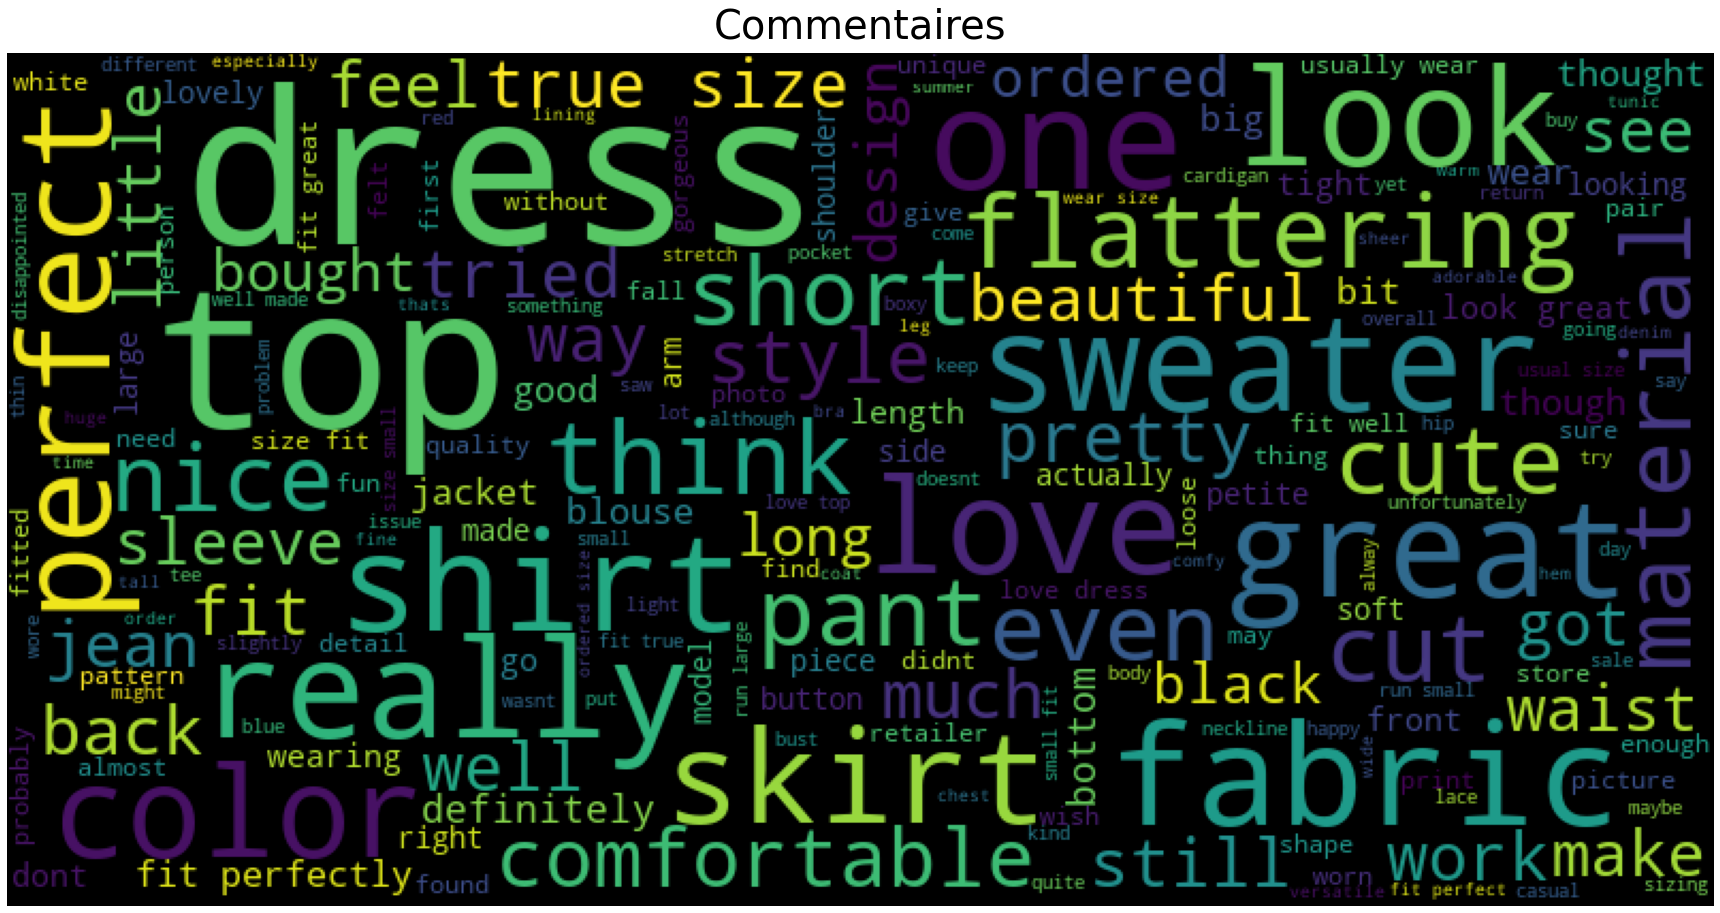

In [64]:
plot_wordcloud(Preprocess_listofSentence(data_noNa['Review Text']),title = 'Commentaires')

### Top 20 des trigrams avant le removing stopwords

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

In [79]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(data_noNa['Review Text'], 20)
for word, freq in common_words:
    print(word, freq)
df_before_remove = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])

true to size 1178
the fabric is 1168
this dress is 981
the material is 780
in the store 659
on the model 655
the fit is 620
this top is 583
the color is 563
tried it on 522
it is very 513
love this dress 510
and it is 506
in the back 480
and it was 475
up or down 468
the dress is 455
to wear it 432
the colors are 426
my usual size 418


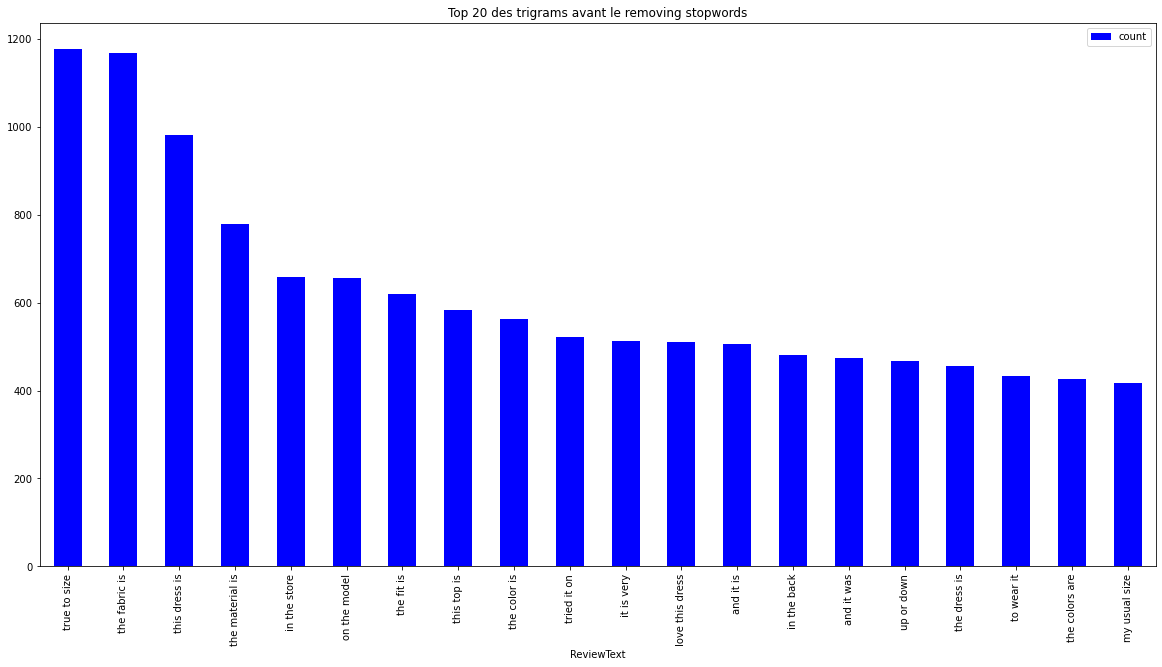

In [110]:
# Visualisation des top 20 mots
df_before_remove.plot(kind='bar',x='ReviewText', y='count', color='blue', figsize=(20,10))
plt.title('Top 20 des trigrams avant le removing stopwords')
plt.show()

### Top 20 des trigrams après le removing stopwords

In [115]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(data_noNa['Review_Text_cleaned'], 20)
for word, freq in common_words:
    print(word, freq)
df_after_remove = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])

fit true size 442
cant wait wear 193
run true size 165
size fit perfectly 158
received many compliment 148
small fit perfectly 126
usually wear size 122
fit like glove 111
ordered usual size 109
love love love 104
size small fit 88
every time wear 75
usual size fit 75
run little big 74
run little large 73
usually wear small 73
look great jean 72
medium fit perfectly 71
make look like 69
run bit large 67


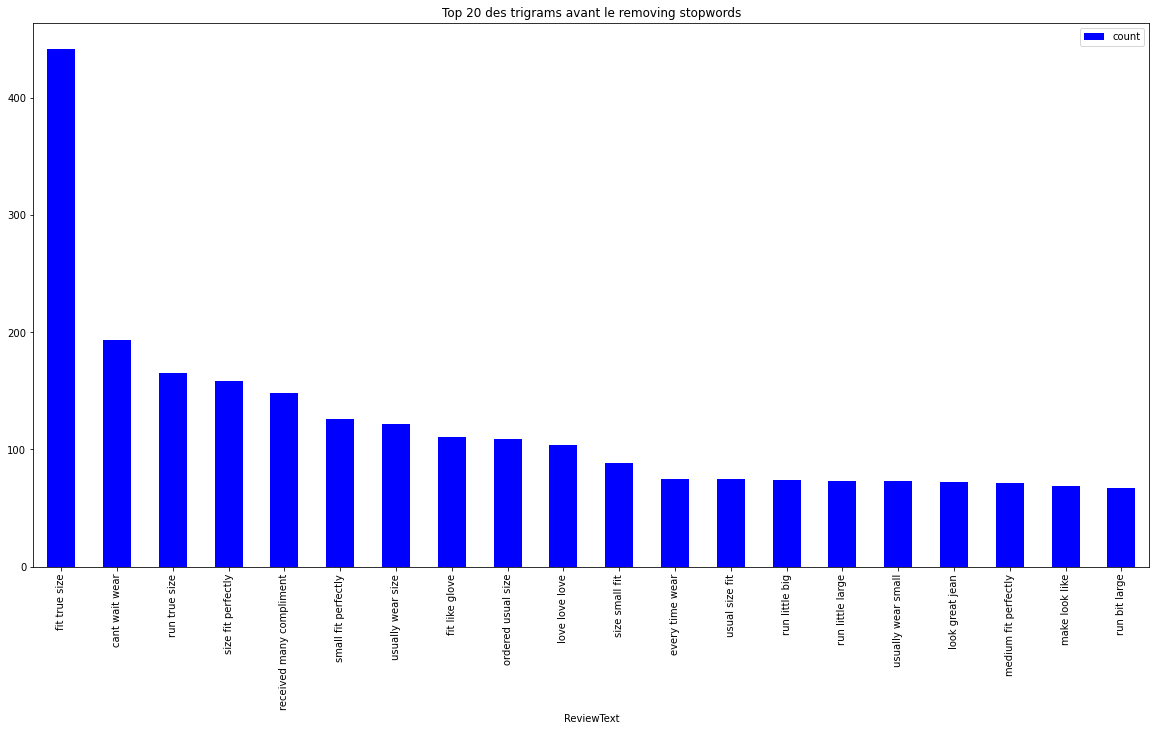

In [116]:
# Visualisation des top 20 mots
df_after_remove.plot(kind='bar',x='ReviewText', y='count', color='blue', figsize=(20,10))
plt.title('Top 20 des trigrams avant le removing stopwords')
plt.show()

# PARTITIONNEMENT DES DONNEES

In [11]:
# Importation de TfidfVectorizer et RegexTokenizer
from nltk.tokenize import RegexpTokenizer
#from sklearn.feature_extraction.text import CountVectorizer

In [12]:
# Creation de regex_tokenizer pour supprimer les caracteres spéciaux et les valeurs numériques.  
reg_tokenizer = RegexpTokenizer(r'[a-zA-Z]+')

In [13]:
# Initialisation de CountVectorizer
count_vectorizer = CountVectorizer(lowercase=True, stop_words='english',
                        ngram_range=(1,1), tokenizer=reg_tokenizer.tokenize)

In [14]:
# Fitting de la transformation dans la variable d'observations textuelles
count_vectors = count_vectorizer.fit_transform(data_noNa['Review_Text_cleaned'])

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(count_vectors, data_noNa['Recommended IND'], test_size = 0.3, random_state =1)

In [25]:
# Package pour équlibrer les données
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours

In [27]:
# Equilibrage des données
X_train, y_train=SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='majority')).fit_resample(X_train,y_train)

y_train.value_counts()

1    11278
0    11121
Name: Recommended IND, dtype: int64

# MODELISATION DES DONNEES

## ENTRAINEMENT STANDARD 

In [19]:
#importation du f1_score
from sklearn.metrics import f1_score
#importation du la fonction time()
from time import time

In [28]:
#Définition de fonction 
def modelisation(ModelsList , X_train_scaled , y_train , X_test_scaled , y_test ):
  scores = []
  for mod in ModelsList :
    try : 
      model = mod(random_state = 42) #instanciation avec random_state
    except TypeError :
      model = mod() #instanciation sans random_state
    debut = time() #calcul du temps de début
    model.fit(X_train , y_train) #entrainement
    fin = time() #calcul du temps de fin
    y_pred_train = model.predict(X_train) #calcul des prédictions par rapport aux données d'entrainement
    y_pred_test = model.predict(X_test) #calcul des prédictions par rapport aux données de test
    scores.append({"Modeles" : type(model).__name__ , 
                   "temps_apprentissage" : fin - debut,
                   "f1_train_score" : f1_score(y_train , y_pred_train) ,
                   "f1_test_score" : f1_score(y_test , y_pred_test)})
  return pd.DataFrame(scores)

In [29]:
  #importation des algorithmes
  from sklearn.linear_model import LogisticRegression
  from sklearn.neighbors import KNeighborsClassifier
  from sklearn.svm import SVC
  from sklearn.tree import DecisionTreeClassifier
  from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier, GradientBoostingClassifier

In [30]:
#liste de modeles
ModelsList = [RandomForestClassifier , AdaBoostClassifier, GradientBoostingClassifier,
              DecisionTreeClassifier , KNeighborsClassifier, LogisticRegression , SVC]

In [31]:
#premier essai de modélisation
scores = modelisation(ModelsList ,X_train, y_train , X_test, y_test)
scores.set_index("Modeles" , inplace = True)
scores

,temps_apprentissage,f1_train_score,f1_test_score
Modeles,,,
RandomForestClassifier,166.040095,0.999956,0.892939
AdaBoostClassifier,18.458271,0.864664,0.860473
GradientBoostingClassifier,50.848581,0.881264,0.870593
DecisionTreeClassifier,12.751096,0.999956,0.843191
KNeighborsClassifier,0.007001,0.212803,0.118015
LogisticRegression,1.290358,0.947392,0.899578
SVC,198.179155,0.977140,0.906583


In [32]:
#normalisation du temps_apprentissage
scores["temps_apprentissage"] = scores["temps_apprentissage"]/scores["temps_apprentissage"].max()
scores

,temps_apprentissage,f1_train_score,f1_test_score
Modeles,,,
RandomForestClassifier,0.837828,0.999956,0.892939
AdaBoostClassifier,0.093139,0.864664,0.860473
GradientBoostingClassifier,0.256579,0.881264,0.870593
DecisionTreeClassifier,0.064341,0.999956,0.843191
KNeighborsClassifier,0.000035,0.212803,0.118015
LogisticRegression,0.006511,0.947392,0.899578
SVC,1.000000,0.977140,0.906583


On peut remarquer que le modèle LogisticRegression est le meilleur modèle. 

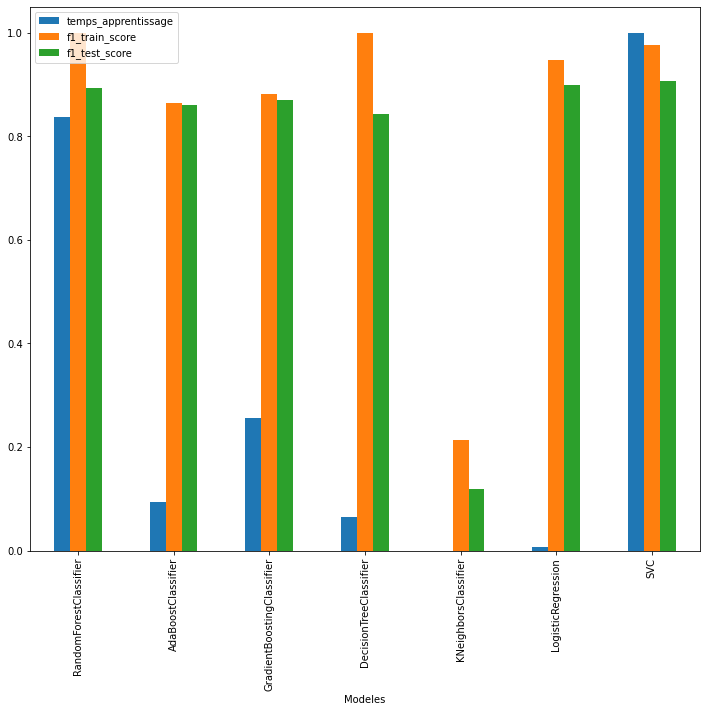

In [33]:
#visualisation 
scores.plot.bar(figsize=(12,10))
plt.show()

## ENTRAINEMENT PAR VALIDATION CROISEE

In [34]:
#importation de la fonction de validation croisée
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold

In [35]:
#définition du nombre de split
cv = StratifiedKFold(n_splits = 5)

In [36]:
#Définition de fonction de validation croisee
def crossValidation(ModelsList , X_train, y_train):
  scores = []
  for mod in ModelsList :
    try : 
      model = mod(random_state = 42) #instanciation avec random_state
    except TypeError :
      model = mod() #instanciation sans random_state
    debut = time() #calcul du temps de début
    score = cross_validate(estimator = model , X = X_train , y = y_train , cv = cv , 
               scoring = 'f1', n_jobs = -1 , return_train_score = True)  #entrainement
    fin = time() #calcul du temps de fin
    scores.append({"Modeles" : type(model).__name__ , 
                   "temps_apprentissage" : fin - debut,
                   "f1_train_score" : score['train_score'].mean() ,
                   "f1_test_score" : score['test_score'].mean()})
  return pd.DataFrame(scores)

In [37]:
#entrainement par validation croisée
scores = crossValidation(ModelsList ,X_train, y_train)
scores.set_index("Modeles" , inplace = True)
scores

,temps_apprentissage,f1_train_score,f1_test_score
Modeles,,,
RandomForestClassifier,348.884196,0.999956,0.910072
AdaBoostClassifier,44.917184,0.871097,0.856089
GradientBoostingClassifier,109.585114,0.885951,0.865901
DecisionTreeClassifier,22.663183,0.999956,0.847136
KNeighborsClassifier,115.655519,NaN,0.100787
LogisticRegression,2.985459,0.951956,0.892245
SVC,409.785117,0.977145,0.905447


L'entrainement par validation croisée ne fait que confirmer que le modèle LogisticRegression est le meilleur modèle en termes de généralisation (temps, score)

In [38]:
#normalisation du temps_apprentissage
scores["temps_apprentissage"] = scores["temps_apprentissage"]/scores["temps_apprentissage"].max()
scores

,temps_apprentissage,f1_train_score,f1_test_score
Modeles,,,
RandomForestClassifier,0.851383,0.999956,0.910072
AdaBoostClassifier,0.109612,0.871097,0.856089
GradientBoostingClassifier,0.267421,0.885951,0.865901
DecisionTreeClassifier,0.055305,0.999956,0.847136
KNeighborsClassifier,0.282235,NaN,0.100787
LogisticRegression,0.007285,0.951956,0.892245
SVC,1.000000,0.977145,0.905447


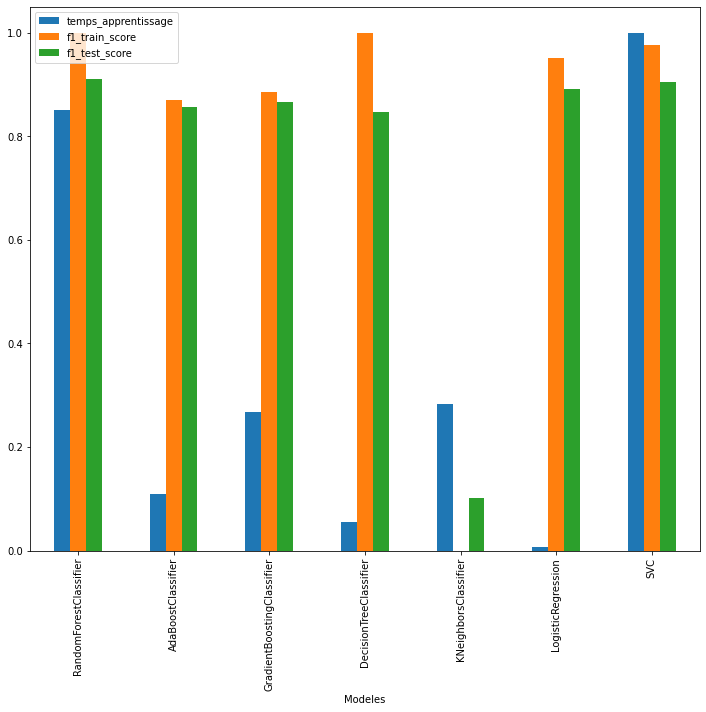

In [39]:
#visualisation 
scores.plot.bar(figsize=(12,10))
plt.show()

## OPTIMISATION DE NOTRE MODELE

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, f1_score

In [41]:
tuned_parameters = [{'penalty': ['l1','l2'],'C':np.logspace(-3,3,7), 'solver': ['newton-cg','lbfgs','liblinear']}]
                    

In [42]:
model_grid = GridSearchCV(estimator=LogisticRegression(),param_grid=tuned_parameters, scoring ='f1',cv =3)
model_grid.fit(X_train , y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid=[{'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                          'penalty': ['l1', 'l2'],
                          'solver': ['newton-cg', 'lbfgs', 'liblinear']}],
             scoring='f1')

In [43]:
print("meilleur score:",model_grid.best_score_)
print("meilleurs parametres:",model_grid.best_params_)

meilleur score: 0.8776336611405516
meilleurs parametres: {'C': 10.0, 'penalty': 'l2', 'solver': 'lbfgs'}


In [44]:
best_model = LogisticRegression(C =10, penalty='l2', solver = 'lbfgs')
best_model.fit(X_train, y_train)
pred_best = best_model.predict(X_test)
print(classification_report(y_test, pred_best))

              precision    recall  f1-score   support

           0       0.53      0.60      0.56      1090
           1       0.91      0.88      0.89      4809

    accuracy                           0.83      5899
   macro avg       0.72      0.74      0.73      5899
weighted avg       0.84      0.83      0.83      5899



In [45]:
# Calcul du F1-Score
print("F1-Score:",f1_score(y_test,pred_best)*100)

F1-Score: 89.33389544688028


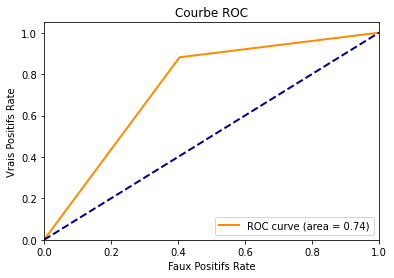

In [50]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calcul des valeurs de la courbe ROC
fpr, tpr, _ = roc_curve(y_test, pred_best)
roc_auc = auc(fpr, tpr)

# Tracé de la courbe ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Faux Positifs Rate')
plt.ylabel('Vrais Positifs Rate')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.show()


### ENREGISTREMENT DU MODEL

In [49]:
import joblib

In [50]:
# Enregistrement de notre modèle
joblib.dump(value=best_model, filename ='Womens Clothing E-Commerce Reviews - NLP.pkl')

['Womens Clothing E-Commerce Reviews - NLP.pkl']

In [51]:
## Chargement du modèle pour de nouvelles prédictions
load_model = joblib.load(filename ='Womens Clothing E-Commerce Reviews - NLP.pkl')

In [59]:
load_model.predict(count_vectorizer.transform(["I like these dresses"])) # Prédiction d'un commentaire

array([1], dtype=int64)

In [58]:
load_model.predict(count_vectorizer.transform(["This is unfortunately"])) # Prédiction d'un commentaire

array([0], dtype=int64)